<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [23]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


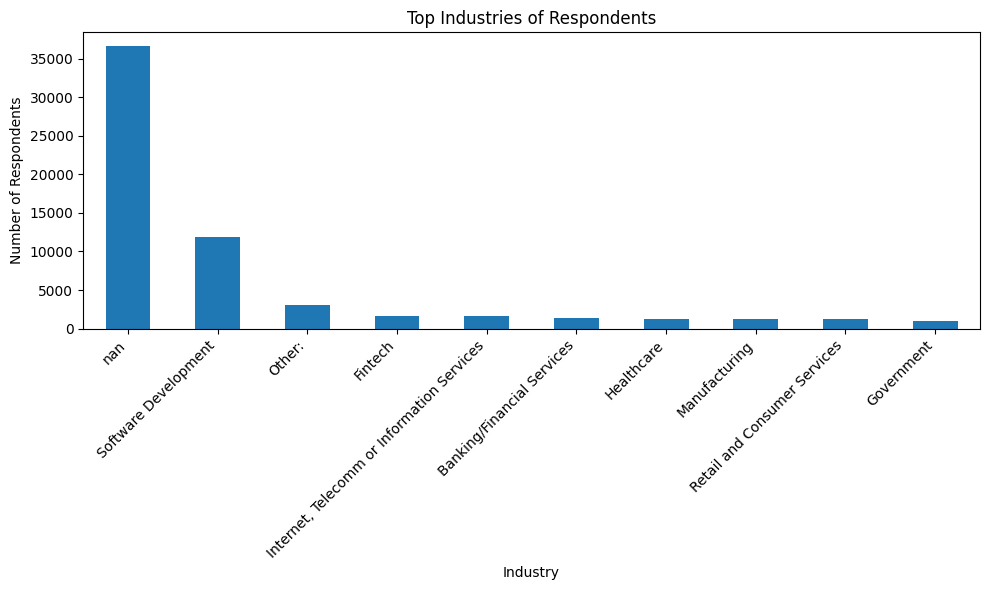

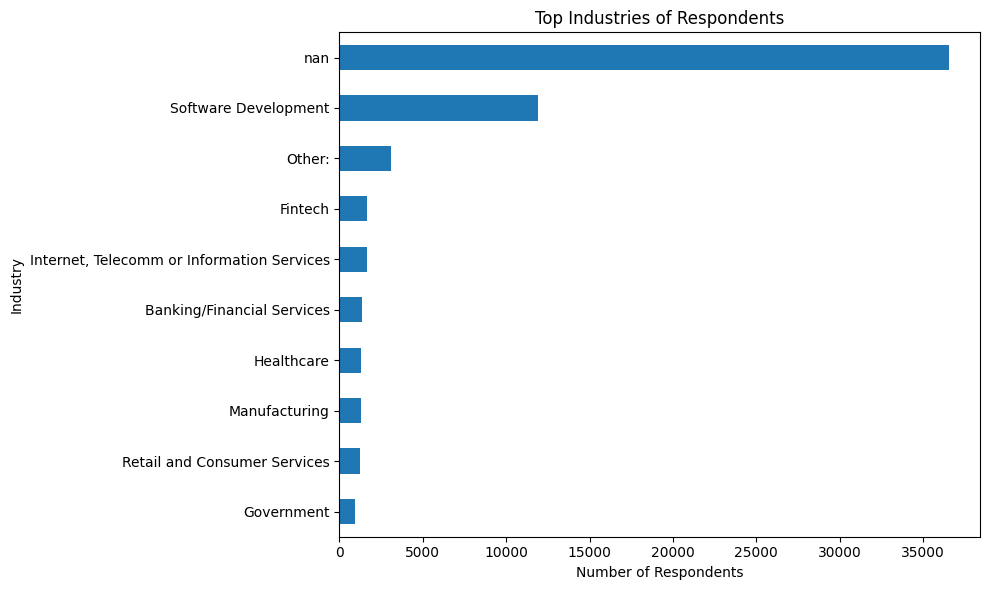

In [7]:
##Write your code here
##Prepare the data (Industry counts)

industry_counts = df['Industry'].value_counts(dropna=False)
industry_counts

##Bar chart
top_n = 10  # show top 10 industries

industry_counts.head(top_n).plot(
    kind='bar',
    figsize=(10,6)
)

plt.title('Top Industries of Respondents')
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Horizontal Bar chart
industry_counts.head(top_n).sort_values().plot(
    kind='barh',
    figsize=(10,6)
)

plt.title('Top Industries of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

##Interpretation
##The bar chart shows that respondents are concentrated in a small number of industries, with technology-related sectors accounting for the largest share. 
##Other industries appear with significantly lower representation, indicating a skewed distribution. This suggests that the survey sample is dominated by professionals 
##from specific industries rather than evenly distributed across all sectors.

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [15]:
##Write your code here
##Prepare data
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp = comp.dropna()
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()
print(f"Mean: ${mean_comp:,.2f}")
print(f"Median: ${median_comp:,.2f}")
print(f"Standard Deviation: ${std_comp:,.2f}")
##Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).
##Using 3 standard deviations above the mean:
threshold = mean_comp + 3 * std_comp
print(f"Extreme compensation threshold: ${threshold:,.2f}")

##Identify respondents with extremely high compensation
high_comp_respondents = df[df['ConvertedCompYearly'] > threshold]
high_comp_respondents[['ConvertedCompYearly']]

##Number of extreme cases
high_comp_respondents.shape[0]
##Top earners
##high_comp_respondents.sort_values(by='ConvertedCompYearly', ascending=False).head(10)

Mean: $86,155.29
Median: $65,000.00
Standard Deviation: $186,756.97
Extreme compensation threshold: $646,426.21


89

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


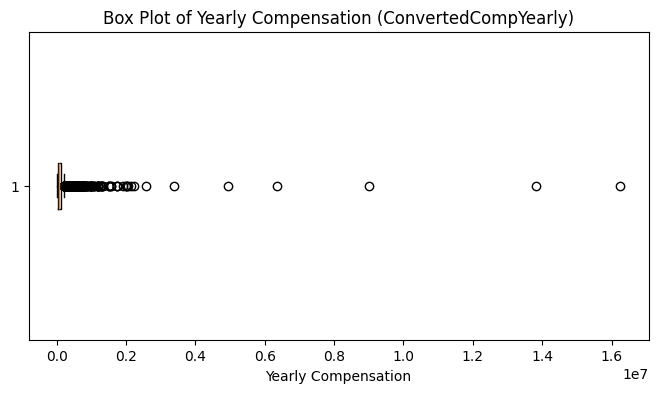

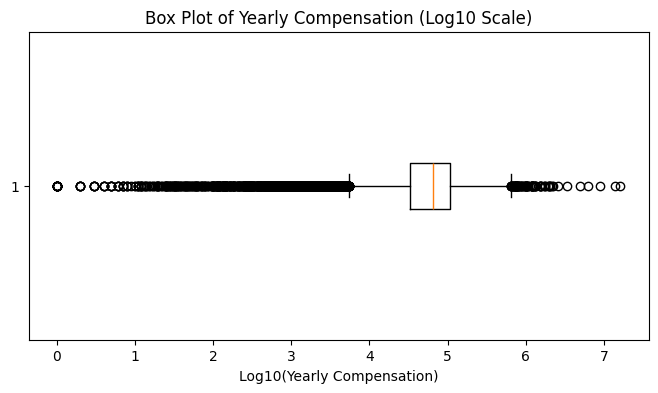

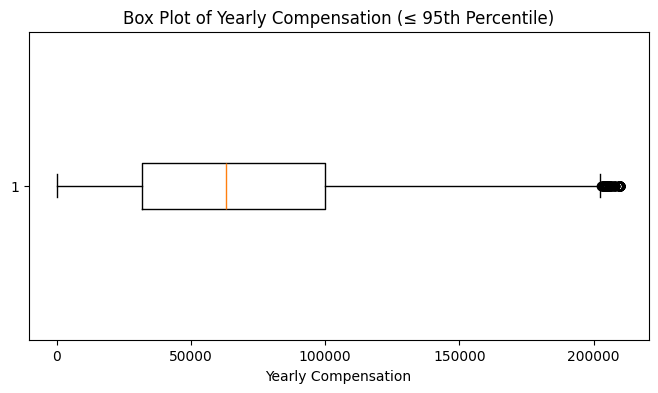

In [25]:
##Write your code here
##Prepare data
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()

##Quartiles and IQR
Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1
## lower and upper bounds
Q1, Q3, IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

##Identify and count outliers
outliers = comp[(comp < lower_bound) | (comp > upper_bound)]
outlier_count = outliers.shape[0]
outlier_count

outliers.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
plt.boxplot(comp, vert=False)
plt.title('Box Plot of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation')
plt.show()

##Zoom in by capping the upper range (very readable) - Focus on the majority of respondents.
upper_cap = comp.quantile(0.95)  # top 5% cutoff
plt.figure(figsize=(8,4))
plt.boxplot(comp[comp <= upper_cap], vert=False)
plt.xlabel('Yearly Compensation')
plt.title('Box Plot of Yearly Compensation (≤ 95th Percentile)')
plt.show()

##The initial box plot was dominated by extreme compensation values, making the distribution unreadable.
##To address this, a log-scaled box plot and a capped percentile view were used, which better represent the central tendency and spread of the data.”

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [27]:
##Write your code here
##remove outliers
df_no_outliers = df[
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
]

print("Original DataFrame size:", df.shape)
print("New DataFrame size (outliers removed):", df_no_outliers.shape)
print("Number of rows removed:", df.shape[0] - df_no_outliers.shape[0])

Original DataFrame size: (65437, 116)
New DataFrame size (outliers removed): (22457, 116)
Number of rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [32]:
##Write your code here
#Transform Age into numeric values

# Copy only relevant columns to avoid modifying original df
df_age = df.copy()

# Mapping age ranges to approximate numeric values
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age['Age_numeric'] = df_age['Age'].map(age_map)
##Other numeric columns (JobSat, YearsCodePro, ConvertedCompYearly, etc.)
numeric_cols = [
    'Age_numeric',
    'JobSat',
    'YearsCodePro',
    'ConvertedCompYearly'
]

# Convert to numeric safely
df_numeric = df_age[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_numeric = df_numeric.dropna()
##Pearson correlation
corr_pearson = df_numeric.corr(method='pearson')
print(corr_pearson)
##spearman correlation
corr_spearman = df_numeric.corr(method='spearman')
corr_spearman

                     Age_numeric    JobSat  YearsCodePro  ConvertedCompYearly
Age_numeric             1.000000  0.071032      0.817808             0.130049
JobSat                  0.071032  1.000000      0.103933             0.047753
YearsCodePro            0.817808  0.103933      1.000000             0.154284
ConvertedCompYearly     0.130049  0.047753      0.154284             1.000000


,Age_numeric,JobSat,YearsCodePro,ConvertedCompYearly
Age_numeric,1.000000,0.075594,0.772506,0.402052
JobSat,0.075594,1.000000,0.121131,0.101238
YearsCodePro,0.772506,0.121131,1.000000,0.470939
ConvertedCompYearly,0.402052,0.101238,0.470939,1.000000


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
